In [18]:
import sys
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import skimage
import skimage.io as io

from skimage.morphology import disk
from skimage.feature import blob_log
from skimage.filters import gaussian


sys.path.append('../../src')
import viz
import log_blobs_detector 
import traj_descriptors as td


import warnings
warnings.filterwarnings('ignore')

## File Log

In [19]:
file_LOG="../../results/Analysized_experiments.csv"
file_Log=pd.read_csv(file_LOG,sep=";")
file_Log["omeroID"]=file_Log["omeroID"].astype('str')
file_Log=file_Log.set_index("omeroID")
file_Log

file_prefix  duration_frames  \
omeroID                                                                       
nan                                 2021May19_8ml_kb_wt-01             41.0   
nan                          2021May3_8ml_kb_RedGlyc_ON-02             21.0   
nan                         2021May6_8ml_kb_RedGlyc_day-01             33.0   
nan                          2021Apr21_8ml_kb_wtglyc_ON-02             48.0   
nan                          2021May18_8ml_kb_Dwss-01MOVIE             41.0   
nan                                 2021May24_8ml_kb_wt-01             43.0   
nan                                                    NaN              NaN   
43113.0  2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...            138.0   
43116.0  2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...             37.0   
43117.0  2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...             35.0   
43118.0  2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...            128.0   
43047.0  2021Feb15_6wellplate_lid_8ml_kb_aliquot_glyc_W...             49.0   

         dx_micron  dy_micron    dt_s  Nrows_px  Ncols_px  
omeroID                                                    
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1200.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan            NaN        NaN     NaN       NaN       NaN  
43113.0     12.971     12.971   300.0    2208.0    2752.0  
43116.0     12.971     12.971  1200.0    2208.0    2752.0  
43117.0     12.971     12.971  1200.0    2208.0    2752.0  
43118.0     12.971     12.971   300.0    2208.0    2752.0  
43047.0     12.971     12.971   300.0    2208.0    2752.0

## Read Detected_blobs 

In [20]:
FileList=glob('../../results/Detected_blobs_*.csv')
FileList

['../../results/Detected_blobs_2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-04.czi.csv',
 '../../results/Detected_blobs_2021Apr21_8ml_kb_wtglyc_ON-02.csv',
 '../../results/Detected_blobs_2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01_overnight.czi".csv',
 '../../results/Detected_blobs_2021May3_8ml_kb_RedGlyc_ON-02.csv',
 '../../results/Detected_blobs_2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01.czi.csv',
 '../../results/Detected_blobs_2021May24_8ml_kb_wt-01.csv',
 '../../results/Detected_blobs_2021May19_8ml_kb_wt-01.csv',
 '../../results/Detected_blobs_2021May18_8ml_kb_Dwss-01MOVIE.csv',
 '../../results/Detected_blobs_2021Feb15_6wellplate_lid_8ml_kb_aliquot_glyc_WT-02.czi.csv',
 '../../results/Detected_blobs_2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-03_overnight.czi.csv',
 '../../results/Detected_blobs_2021May6_8ml_kb_RedGlyc_day-01.csv']

## Bobs analysis

In [21]:
Blobs_all_experiments=pd.DataFrame()

for file in FileList:
    df=pd.read_csv(file)
    Blobs_all_experiments=pd.concat([Blobs_all_experiments,df])

# contrast filter    
Blobs_all_experiments= Blobs_all_experiments[Blobs_all_experiments["contrast"]>0.06]


def blobs_counter(df):
    Count=df.groupby(['time_min']).apply(lambda x: len(x['radius']))
    A=Count.reset_index('time_min')
    A=A.rename(columns={A.columns[1]:"Count"})
    A['Count_correct']=A['Count']-A['Count'].iloc[0]
    return A


df_Counter=pd.DataFrame()
for id, group in  Blobs_all_experiments.groupby("file_prefix"):
    df_counter=blobs_counter(group)
    df_counter["file_prefix"]=id
    #df_counter['time']=df_counter['frame']*dt
    df_Counter=pd.concat([df_Counter,df_counter])

## Filter experiments
* 2021Apr21_8ml_kb_wtglyc_ON-02

* 2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01_overnight.czi"
* 2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-03_overnight.czi

In [22]:
df_Counter=df_Counter[df_Counter['file_prefix']!='2021Apr21_8ml_kb_wtglyc_ON-02']
df_Counter=df_Counter[df_Counter['file_prefix']!='2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01_overnight.czi"']
df_Counter=df_Counter[df_Counter['file_prefix']!='2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-03_overnight.czi']

In [23]:
df_Counter.columns

Index(['time_min', 'Count', 'Count_correct', 'file_prefix'], dtype='object')

In [24]:
file_Log

file_prefix  duration_frames  \
omeroID                                                                       
nan                                 2021May19_8ml_kb_wt-01             41.0   
nan                          2021May3_8ml_kb_RedGlyc_ON-02             21.0   
nan                         2021May6_8ml_kb_RedGlyc_day-01             33.0   
nan                          2021Apr21_8ml_kb_wtglyc_ON-02             48.0   
nan                          2021May18_8ml_kb_Dwss-01MOVIE             41.0   
nan                                 2021May24_8ml_kb_wt-01             43.0   
nan                                                    NaN              NaN   
43113.0  2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...            138.0   
43116.0  2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...             37.0   
43117.0  2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...             35.0   
43118.0  2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...            128.0   
43047.0  2021Feb15_6wellplate_lid_8ml_kb_aliquot_glyc_W...             49.0   

         dx_micron  dy_micron    dt_s  Nrows_px  Ncols_px  
omeroID                                                    
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1200.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan            NaN        NaN     NaN       NaN       NaN  
43113.0     12.971     12.971   300.0    2208.0    2752.0  
43116.0     12.971     12.971  1200.0    2208.0    2752.0  
43117.0     12.971     12.971  1200.0    2208.0    2752.0  
43118.0     12.971     12.971   300.0    2208.0    2752.0  
43047.0     12.971     12.971   300.0    2208.0    2752.0

## Time shift


In [25]:
def time_shift(df,experiment_name,time_shift_min):
    selection=df['file_prefix']==experiment_name
    df.loc[selection,'time_min']=df_Counter.loc[selection,'time_min']+time_shift_min
    return df

* 2021Feb16

In [26]:
overnight=file_Log[file_Log['file_prefix']=='2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01_overnight.czi"']
delay=overnight['duration_frames']*overnight['dt_s']/60

selection=df_Counter['file_prefix']=='2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01.czi'
df_Counter.loc[selection,'time_min']=df_Counter.loc[selection,'time_min']+delay.values[0]

* 2021Feb17

In [27]:
overnight=file_Log[file_Log['file_prefix']=='2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-03_overnight.czi']
delay=overnight['duration_frames']*overnight['dt_s']/60

selection=df_Counter['file_prefix']=='2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-04.czi'
df_Counter.loc[selection,'time_min']=df_Counter.loc[selection,'time_min']+delay.values[0]

* 2021Feb15 (from Elisa) 12 hours

In [28]:
df_Counter=time_shift(df_Counter,'2021Feb15_6wellplate_lid_8ml_kb_aliquot_glyc_WT-02.czi',12*60)

* 2021May3 10 hours

In [29]:
df_Counter=time_shift(df_Counter,'2021May3_8ml_kb_RedGlyc_ON-02',10*60)

* 2021May6 10 hours

In [30]:
df_Counter=time_shift(df_Counter,'2021May6_8ml_kb_RedGlyc_day-01',10*60)

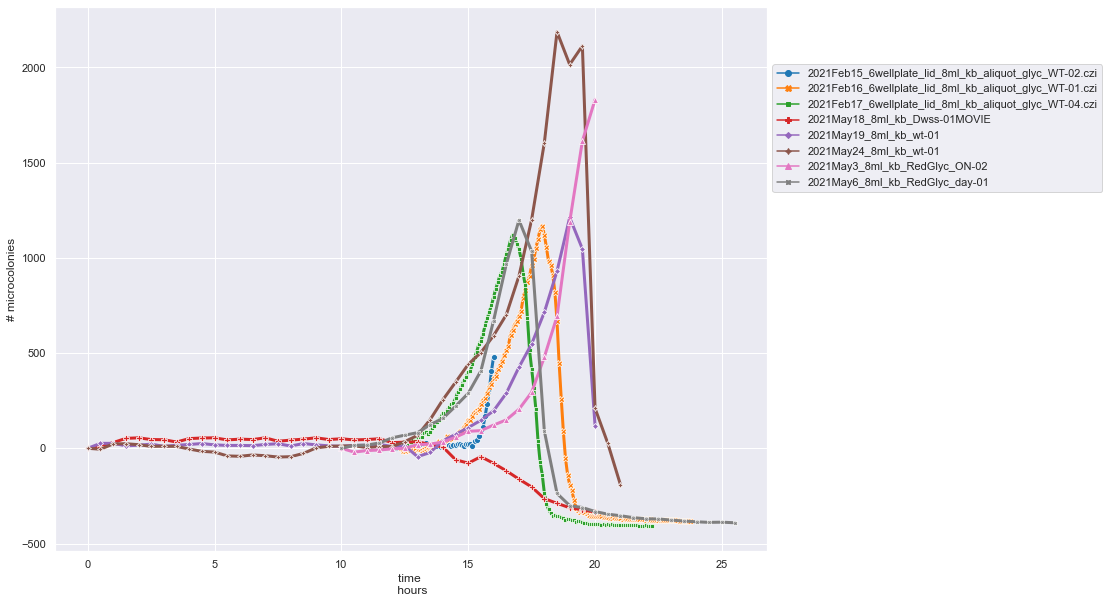

In [31]:
sns.set(font_scale=1)
fig,axx=plt.subplots(nrows=1, ncols=1,figsize=(15,10))
df_Counter['time_hours']=df_Counter['time_min']/60
g=sns.lineplot(data=df_Counter,x='time_hours',y='Count_correct',hue='file_prefix',style="file_prefix",palette="tab10", linewidth = 3,markers=True, dashes=False,ax=axx)
axx.set_ylabel("# microcolonies")
axx.set_xlabel("time \n hours")
#axx.set_xlim([13.0,24.0])

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
g.legend(loc='lower left', bbox_to_anchor=(1, 0.65), ncol=1)

# some patches could be processed sorter or longer (ranging from 48 to 61 frames)
#axx.set_xlim([0,dt*48.5]);
plt.savefig("../../results/Number_Colonies.png", bbox_inches="tight")

## Alinged plots

In [96]:
def calculated_shift(file_fixed,file_find):
    # calculate optimal time shift to adjust plots
    from sklearn.metrics import mean_squared_error
    
    # select fixed file
    dt_fixed=file_Log[file_Log['file_prefix']==file_fixed]["dt_s"].values[0]
    df_fixed=df_Counter.loc[df_Counter['file_prefix']==file_fixed,['time_min','Count_correct']]
    
    # select adjusted file
    dt_find=file_Log[file_Log['file_prefix']==file_find]["dt_s"].values[0]
    df_find=df_Counter.loc[df_Counter['file_prefix']==file_find,['time_min','Count_correct']]
    
    delta_t=int(dt_find/dt_fixed)
    df_fixed_new=df_fixed[::delta_t].reset_index()
    

    mse_all=[]
    for d_shift in range(-40,40):
        df_find_temp=df_find.shift(d_shift,fill_value=0)
        mse=np.sum((df_find_temp-df_fixed_new)['Count_correct']**2)
        mse_dict={"shift":d_shift,"mse":mse}
        mse_all.append(mse_dict)

    mse_all=pd.DataFrame(mse_all)
    calculated_shift=int(mse_all.iloc[np.argmin(mse_all["mse"].values)]['shift'])
    
    df_find_temp=df_find.shift(calculated_shift,fill_value=0)
    df_find_temp["time_alinged_min"]=range(0,df_find_temp.shape[0])*dt_find/60
   
    
    fig,ax=plt.subplots(figsize=(8,8))
    ax.set_title(file_find)
    ax.plot(df_fixed_new['Count_correct'],'-o',label='fixed')
    ax.plot(df_find['Count_correct'],'green',label='original position')
    ax.plot(df_find_temp['Count_correct'],label='adjusted')
    plt.legend()
    plt.show()
    
    
    return df_find_temp

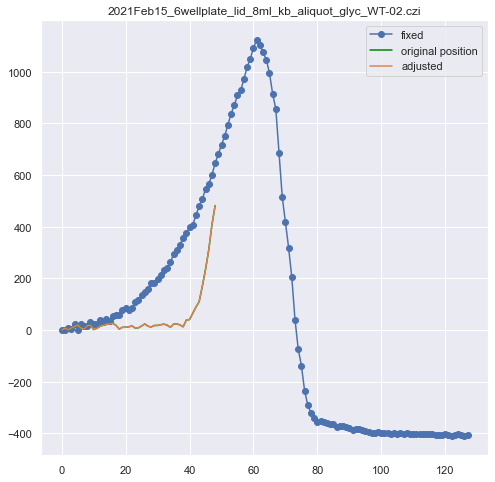

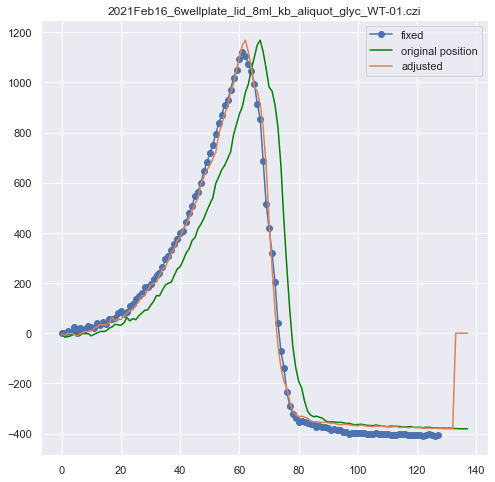

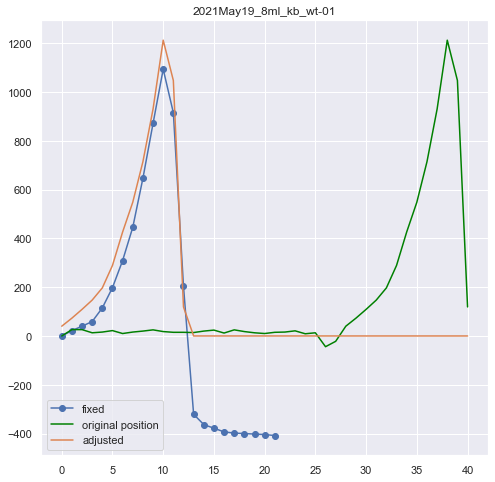

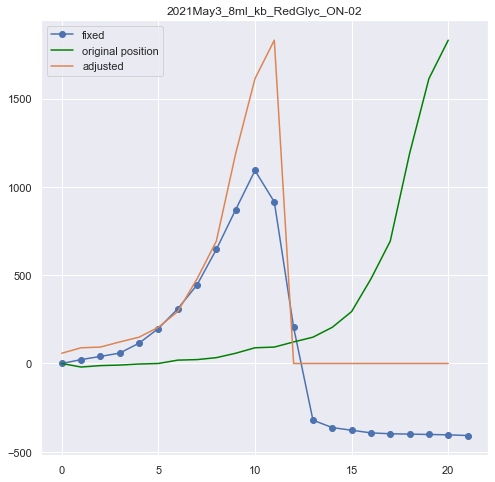

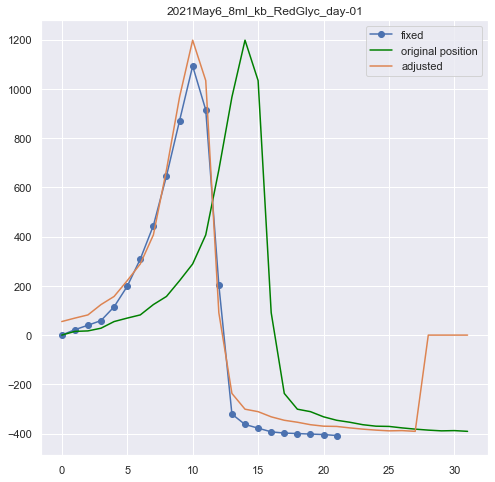

In [97]:
# init file name that other files will be alinged to
file_fixed='2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-04.czi'
df_alinged=df_Counter.loc[df_Counter['file_prefix']==file_fixed,['file_prefix','time_min','Count_correct']]
dt=file_Log[file_Log['file_prefix']==file_fixed]["dt_s"].values[0]
df_alinged["time_alinged_min"]=range(0,df_alinged.shape[0])*dt/60


for id,group in df_Counter.groupby('file_prefix'):
    if (id!=file_fixed)&(id!='2021May24_8ml_kb_wt-01')&(id!='2021May18_8ml_kb_Dwss-01MOVIE'):
        df_find_temp=calculated_shift(file_fixed,id)
        df_find_temp['file_prefix']=id
        df_alinged=pd.concat([df_alinged,df_find_temp])
        #ax.plot(df_adjusted['Count_correct'],label=file_find)

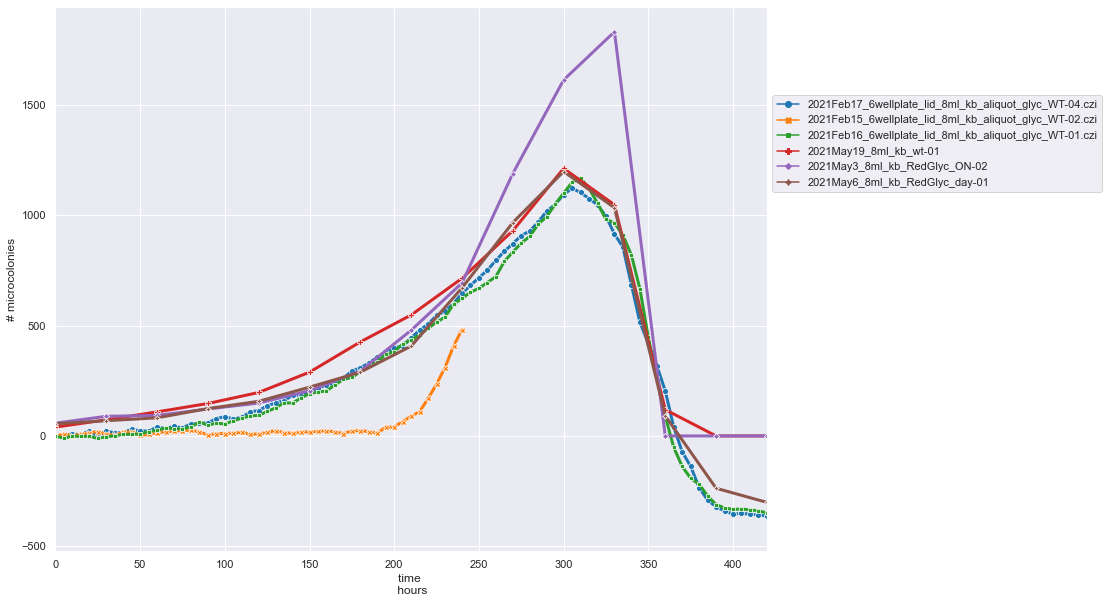

In [102]:
sns.set(font_scale=1)
fig,axx=plt.subplots(nrows=1, ncols=1,figsize=(15,10))

g=sns.lineplot(data=df_alinged,x="time_alinged_min",y='Count_correct',hue='file_prefix',style="file_prefix",palette="tab10", linewidth = 3,markers=True, dashes=False,ax=axx)
axx.set_ylabel("# microcolonies")
axx.set_xlabel("time \n hours")
#axx.set_xlim([13.0,24.0])

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
g.legend(loc='lower left', bbox_to_anchor=(1, 0.65), ncol=1)


axx.set_xlim([0,420]);
#plt.savefig("../../results/Number_Colonies.png", bbox_inches="tight")

## Analyse peaks

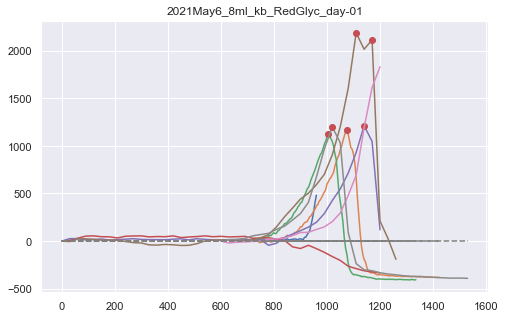

In [38]:
from scipy.signal import find_peaks

df_peaks=[]
fig,ax=plt.subplots(figsize=(8,5))
for id, group in  df_Counter.groupby("file_prefix"):
    x=group['Count_correct'].values
    t=group['time_min'].values
    peaks, _ = find_peaks(x, height=1000)
    
    ax.plot(t,x)
    ax.plot(t[peaks], x[peaks],"or")
    ax.plot(t,np.zeros_like(x), "--", color="gray")
    ax.set_title(id)

    
    for p in peaks:
        file_peaks={"file_prefix":id,"peak_t_min":t[p],"peak_number_colonies":x[p]}
        #ax.axvline(x=t[p]-350)
        df_peaks.append(file_peaks)
    
    
    
df_peaks=pd.DataFrame(df_peaks)

In [39]:
from sklearn import linear_model
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def linear_regression(time,prop):
    """
    Linear regression time vs properties
    (could be area,orientation,compactness)
    
    """
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    
    # reshape required for LinearRegression
    time=time.values.reshape(-1, 1)
    
    # Create linear regression object
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(time, prop)
    
    # Make predictions using the testing set
    prop_predict = regr.predict(time)
    
    
    #     # The coefficients
    #     print('Coefficients: \n', regr.coef_)
    #     # The mean squared error
    #     print('Mean squared error: %.2f'% mean_squared_error(area, area_predict))
    #     # The coefficient of determination: 1 is perfect prediction
    #     print('Coefficient of determination: %.2f'% r2_score(area,area_predict))

    # Plot outputs
    result={"slope":regr.coef_[0], 
                   "intersept":regr.intercept_,
                   "MAE":mean_absolute_error(prop,prop_predict),
                   "R2":r2_score(prop,prop_predict)}
    
    return result,prop_predict

2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01.czi 1075.0 835.0
[ 835.  840.  845.  850.  855.  860.  865.  870.  875.  880.  885.  890.
  895.  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.
  955.  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010.
 1015. 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070.
 1075.]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240.]
[  33   32   41   62   49   58   54   69   80   91   93  111  127  150
  149  172  192  199  204  231  256  265  291  320  336  369  382  416
  435  458  488  515  539  597  623  651  669  695  722  791  833  874
  904  960  993 1050 1100 1149 1168]
2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-04.czi 1005.0 765.0
[ 765.  770.  775.  780.  785.  790.  795.  800.  805.  810.  81

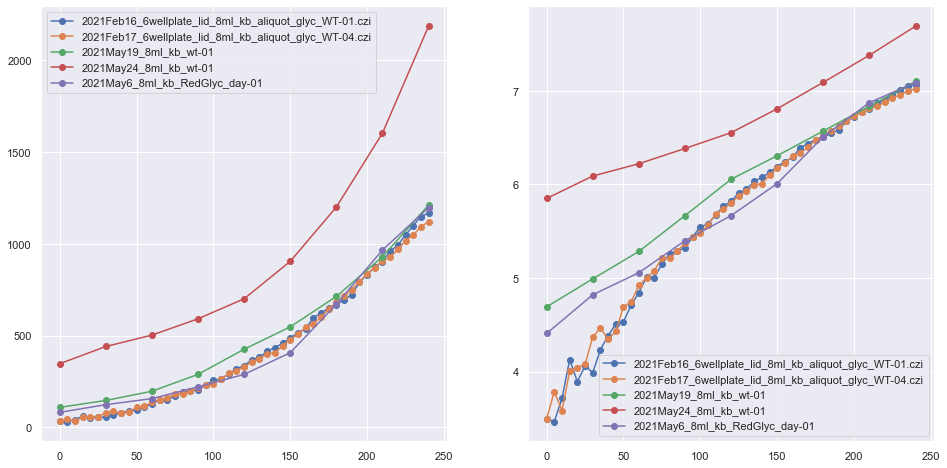

In [40]:
df_peaks=[]
result_fit=[]
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
for id, group in  df_Counter.groupby("file_prefix"):
    x=group['Count_correct'].values
    t=group['time_min'].values
    peaks, _ = find_peaks(x, height=1000,distance=500)
    
    if peaks:
        delta_from_peak_min=t[peaks][0]-240
        group_for_fit=group.loc[((group['time_min']>=delta_from_peak_min) & (group['time_min']<=t[peaks][0]))]
        t_same_start=group_for_fit['time_min']-group_for_fit['time_min'].min()
        print(id,t[peaks][0],delta_from_peak_min)
        print(group_for_fit['time_min'].values)
        print(t_same_start.values)
        print(group_for_fit['Count_correct'].values)
        
        
        
        group_for_fit[group_for_fit['Count_correct']<0]=0
        
          
        result,predict=linear_regression(t_same_start,np.log(group_for_fit['Count_correct']+1e-6))
        result["file_prefix"]=id
          
        result_fit.append(result)
        ax[0].plot(t_same_start,group_for_fit['Count_correct'],'-o',label=id)
        ax[1].plot(t_same_start,np.log(group_for_fit['Count_correct']+1e-6),'-o',label=id)
        #ax[1].plot(t_same_start,predict,color='black',label=id)
        ax[0].legend()
        ax[1].legend()
    

    file_peaks={"file_prefix":id,"peak_t_min":t[peaks],"peak_number_colonies":x[peaks]}
    #ax.axvline(x=t[p]-350)
    df_peaks.append(file_peaks)
    
plt.savefig("../../results/Number_Colonies_5hours_before_peak.png", bbox_inches="tight")

In [48]:
t

array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
       330., 360., 390., 420., 450., 480., 510., 540., 570., 600., 630.,
       660., 690., 720., 750., 780., 810., 840., 870., 900., 930.])

In [55]:
pd.DataFrame(result_fit)

slope  intersept       MAE        R2  \
0  0.014672   3.859389  0.159849  0.969060   
1  0.014183   3.929683  0.142378  0.971801   
2  0.010213   4.718635  0.046274  0.995372   
3  0.007446   5.780315  0.069698  0.981454   
4  0.011336   4.398389  0.056762  0.994384   

                                         file_prefix  
0  2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...  
1  2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...  
2                             2021May19_8ml_kb_wt-01  
3                             2021May24_8ml_kb_wt-01  
4                     2021May6_8ml_kb_RedGlyc_day-01

In [ ]:
result,area_predict=linear_regression(time,area)

In [42]:
df_peaks

[{'file_prefix': '2021Feb15_6wellplate_lid_8ml_kb_aliquot_glyc_WT-02.czi',
  'peak_t_min': array([], dtype=float64),
  'peak_number_colonies': array([], dtype=int64)},
 {'file_prefix': '2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01.czi',
  'peak_t_min': array([1075.]),
  'peak_number_colonies': array([1168])},
 {'file_prefix': '2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-04.czi',
  'peak_t_min': array([1005.]),
  'peak_number_colonies': array([1122])},
 {'file_prefix': '2021May18_8ml_kb_Dwss-01MOVIE',
  'peak_t_min': array([], dtype=float64),
  'peak_number_colonies': array([], dtype=int64)},
 {'file_prefix': '2021May19_8ml_kb_wt-01',
  'peak_t_min': array([1140.]),
  'peak_number_colonies': array([1212])},
 {'file_prefix': '2021May24_8ml_kb_wt-01',
  'peak_t_min': array([1110.]),
  'peak_number_colonies': array([2187])},
 {'file_prefix': '2021May3_8ml_kb_RedGlyc_ON-02',
  'peak_t_min': array([], dtype=float64),
  'peak_number_colonies': array([], dtype=int64)},
 {'file_prefix

## Separate patches

In [41]:
df_Counter_cut=pd.DataFrame()
for file_prefix, group in Blobs_all_experiments.groupby("file_prefix"):
    for (cut,idd) in group.groupby('cut'):
        df_counter=blobs_counter(idd)
        df_counter["file_prefix"]=file_prefix
        df_counter["cut"]=cut
        df_Counter_cut=pd.concat([df_Counter_cut,df_counter])

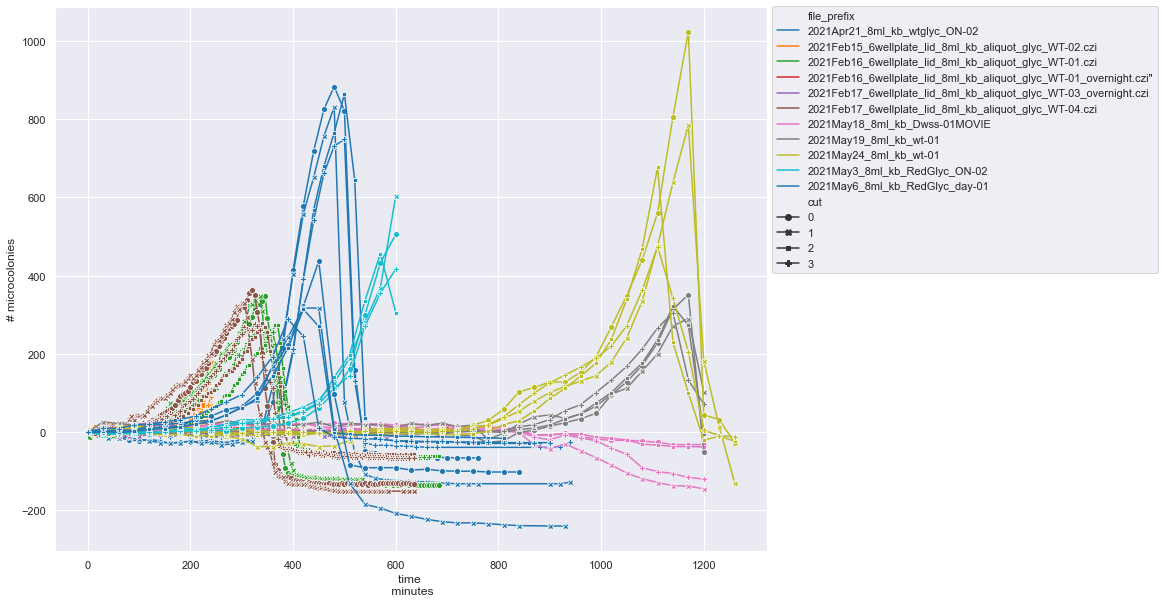

In [42]:
sns.set(font_scale=1)
fig,axx=plt.subplots(nrows=1, ncols=1,figsize=(15,10))
g=sns.lineplot(data=df_Counter_cut,x='time_min',y='Count_correct',hue='file_prefix',style="cut",palette="tab10", linewidth = 1.5,markers=True, dashes=False,ax=axx)
axx.set_ylabel("# microcolonies")
axx.set_xlabel("time \n minutes")

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
g.legend(loc='lower left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.savefig("../../results/Number_Colonies_separate_cut.png", bbox_inches="tight")